In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape")
# to avoid unicode errors -> unicode_escape

In [12]:
df.shape ## to check number of columns and rows

(11251, 15)

In [13]:
df.head()   ## to check the first fives rows of the dataset

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning of the data_set

In [14]:
df.info() ## to check the data types and non-null values 

# helps in understanding the structure of the dataset
# removing unnecessary / blanks columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [19]:
## Drop unnecessary / blanks columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)
df.head() # data will be displayed without the blanks columns

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [24]:
# checking if there is a null value
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [26]:
# drop null values

df.dropna(inplace=True)

In [28]:
df.shape  ### 12 rows deleted

(11239, 13)

In [30]:

pd.isnull(df).sum() # no null values

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [33]:
## changing datatypes
df['Amount'] = df['Amount'].astype('int32')

In [34]:
df['Amount'].dtypes

dtype('int32')

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [38]:
df.describe()  ## statistical summary of numerical columns in the dataset

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [40]:
df[['Amount','Age']].describe()  ## statistical summary of selected columns in the dataset

,Amount,Age
count,11239.000000,11239.000000
mean,9453.610553,35.410357
std,5222.355168,12.753866
min,188.000000,12.000000
25%,5443.000000,27.000000
50%,8109.000000,33.000000
75%,12675.000000,43.000000
max,23952.000000,92.000000


# Exploratory Data Analysis (EDA)

# 1- GENDER

In [41]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

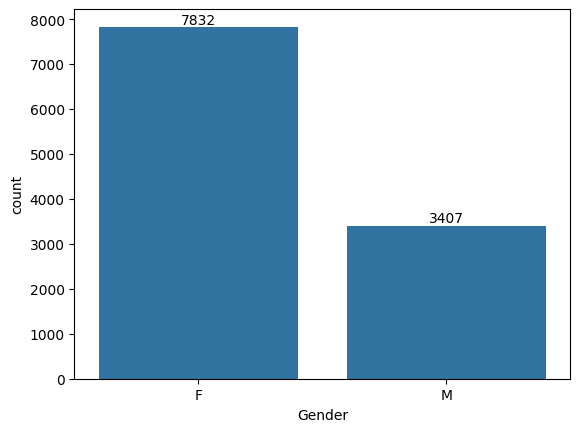

In [61]:
ax = sns.countplot(x='Gender',data = df)   # Creates a countplot displaying the distribution of 'Gender' categories in the 'df' DataFrame.

for bars in ax.containers:  # Adds labels to each bar in the countplot to display the count values.
    ax.bar_label(bars)

In [67]:
sales_gen = df.groupby('Gender',as_index=False)['Amount'].sum()  
# Group the DataFrame by 'Gender' and calculate the total sum of 'Amount' for each gender,
# storing the result in the 'sales_gen' DataFrame without setting 'Gender' as the index.

sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

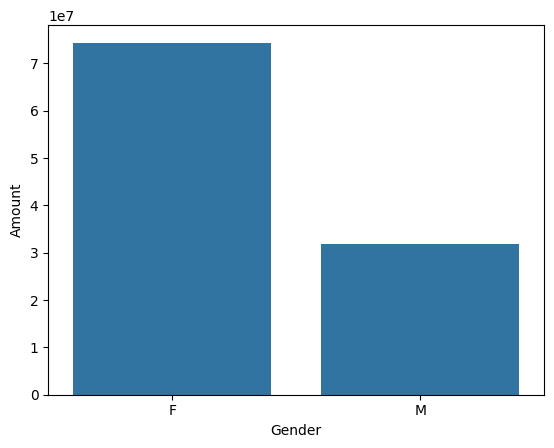

In [71]:
sns.barplot(x='Gender',y='Amount',data=sales_gen) ## Creates a barplot showing the total sales amount for each gender.

## summary of amount spent by Gender

- Females account for ~70% of total sales (74,335,853) vs males ~30% (31,913,276).  
- Females contribute ~2.3× more revenue than males.  
- This gap can be due to more female customers and/or higher average spend per female — check customer counts and average Amount by Gender to confirm.


# 2- AGE

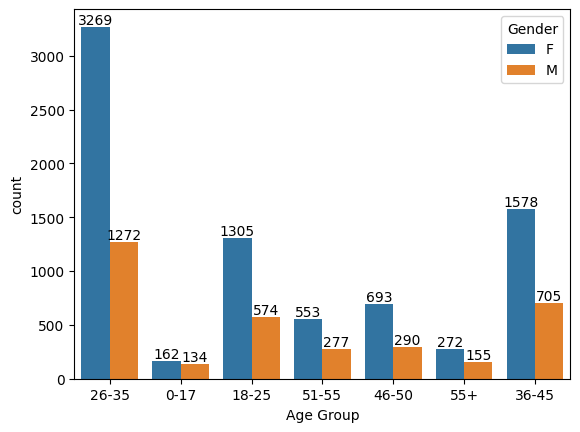

In [78]:
ax = sns.countplot(x= 'Age Group',data = df,hue='Gender')   # Creates a countplot displaying the distribution of 'Age Group' categories in the 'df' DataFrame, separated by 'Gender'.

for bars in ax.containers:
    ax.bar_label(bars)   # Adds labels to each bar in the countplot to display the count values.

In [85]:
sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by= 'Amount',ascending=False)
sales_age

## Sales Analysis by Age Group and Gender

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

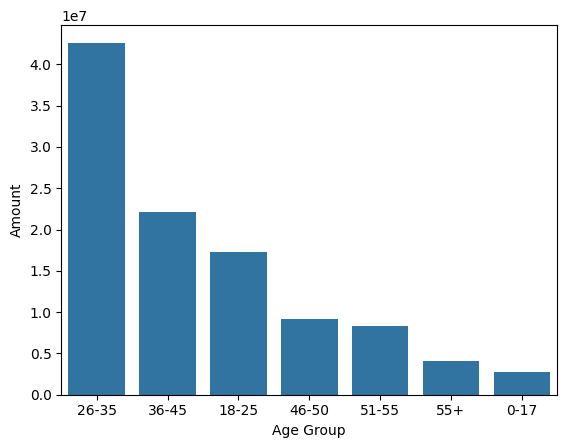

In [ ]:
sns.barplot(x='Age Group', y='Amount', data=sales_age)

# Summary os sales by Age

Count of customers by Age Group (split by Gender). 
The 26–35 group has the highest number of customers, followed by 36–45 and 18–25. Females dominate most age groups (especially 26–35); the 0–17 and 55+ groups have the fewest customers.

# 3- State

In [114]:
sales_state_order = df.groupby('State',as_index=False)['Orders'].sum().sort_values(by = 'Orders',ascending=False)
sales_state_order

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

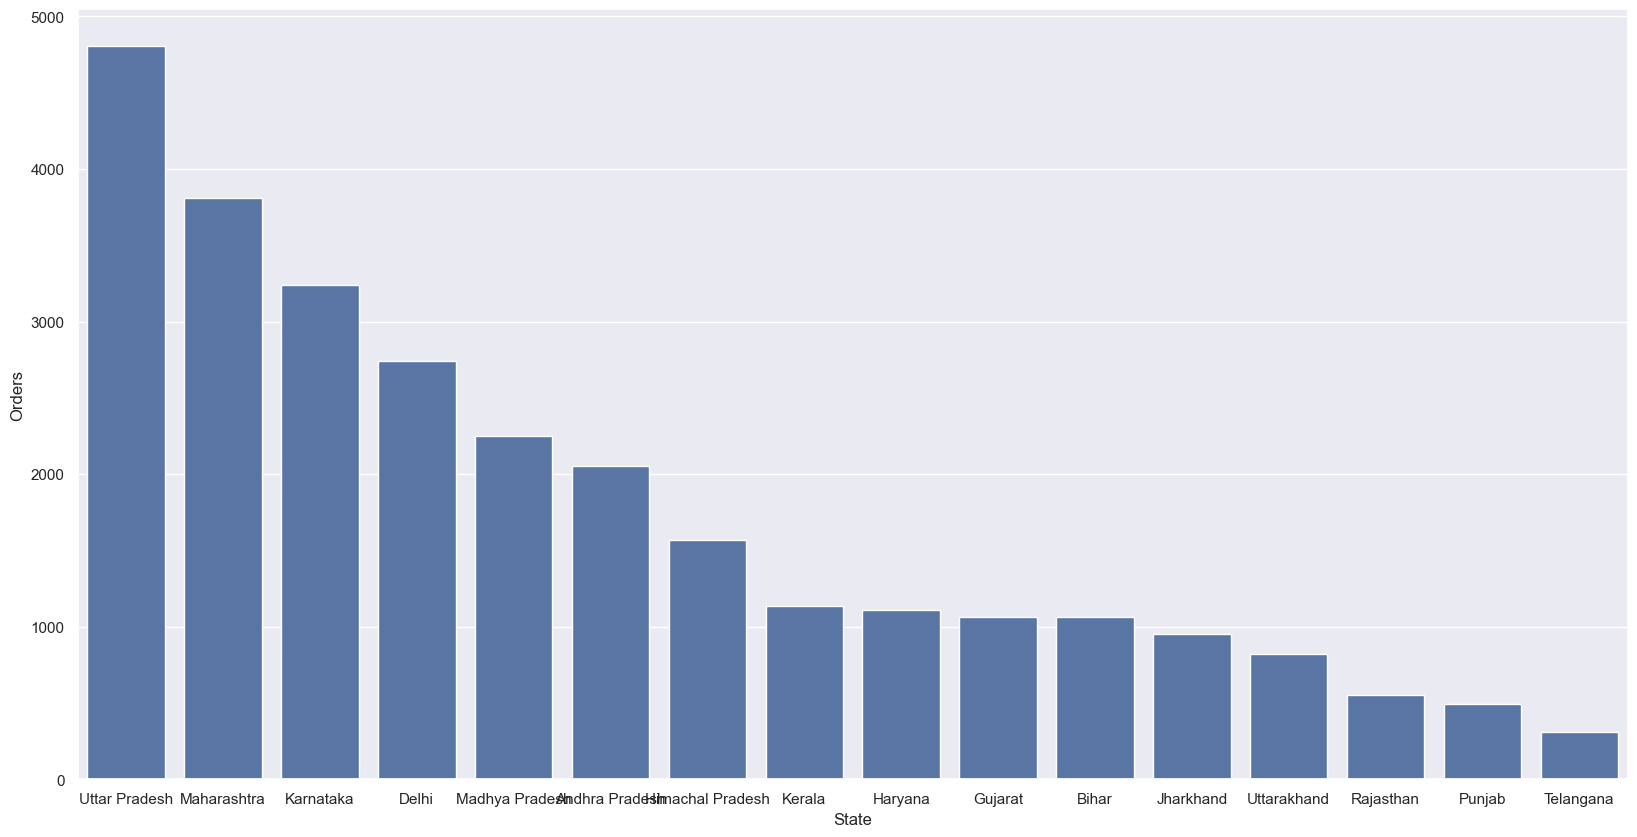

In [123]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='State', y='Orders', data=sales_state_order)



In [ ]:
sales_state_Amount = df.groupby('State',as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)
sales_state_Amount

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

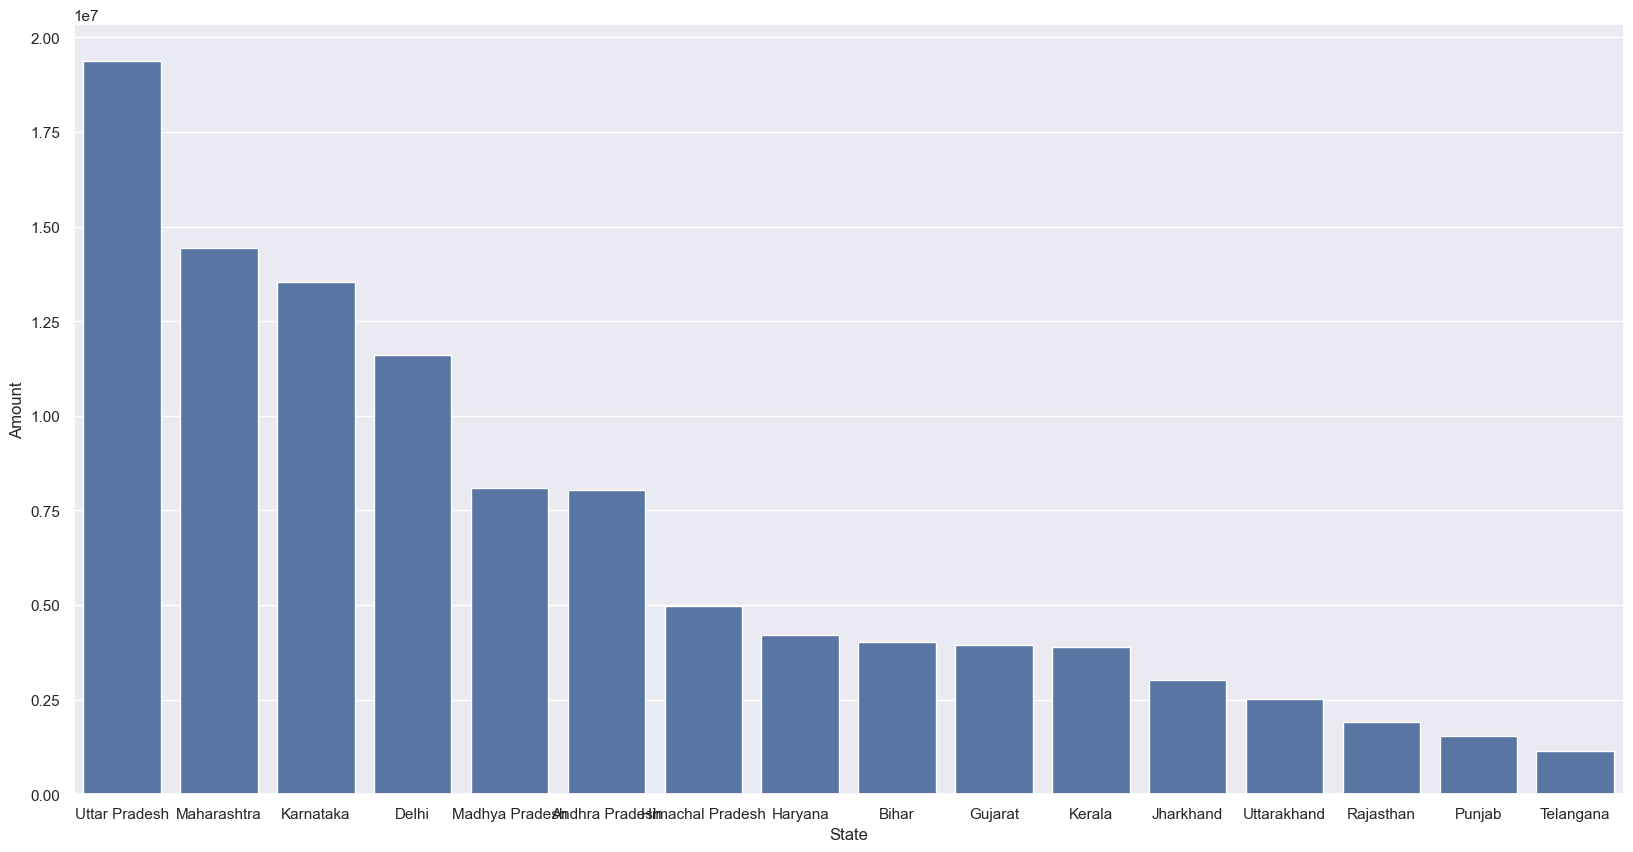

In [124]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='State', y='Amount', data=sales_state_Amount)



Orders (sales_state_order)
- Total orders: 27,981
- Top state: Uttar Pradesh — 4,807 orders (17.18% of total)
- Top 3 states (UP, Maharashtra, Karnataka): 11,857 orders → 42.37% of total
- Bottom 3 states (Rajasthan, Punjab, Telangana): 1,362 orders → 4.87% of total
- Distribution note: skewed toward the top few states (top 3 account for ~42% of orders)

Amount (sales_state_Amount)
- Total amount: ₹106,249,129
- Top state: Uttar Pradesh — ₹19,374,968 (18.24% of total)
- Top 3 states (UP, Maharashtra, Karnataka): ₹47,326,051 → 44.55% of total
- Bottom 3 states (Rajasthan, Punjab, Telangana): ₹4,586,699 → 4.32% of total
- Distribution note: revenue is similarly concentrated — top 3 states contribute ~44.6% of total amount



## 3- Marital status 


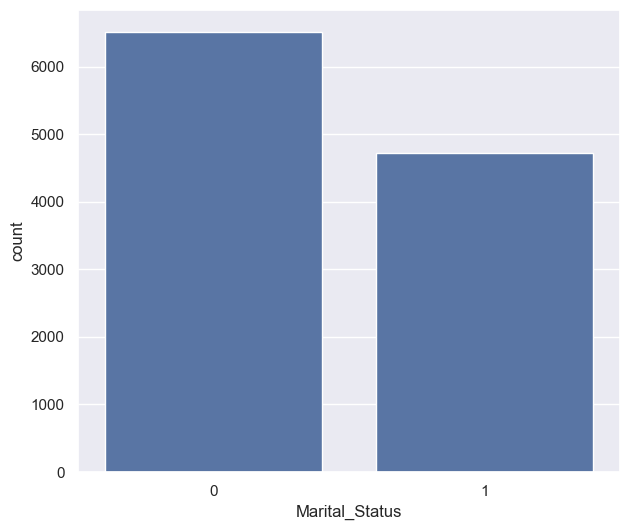

In [138]:
ax = sns.countplot(data=df,x="Marital_Status")
sns.set(rc={"figure.figsize":(7,5)})

In [142]:
sales_Mariatal_status = df.groupby(['Marital_Status','Gender'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sales_Mariatal_status

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<Axes: xlabel='Marital_Status', ylabel='Amount'>

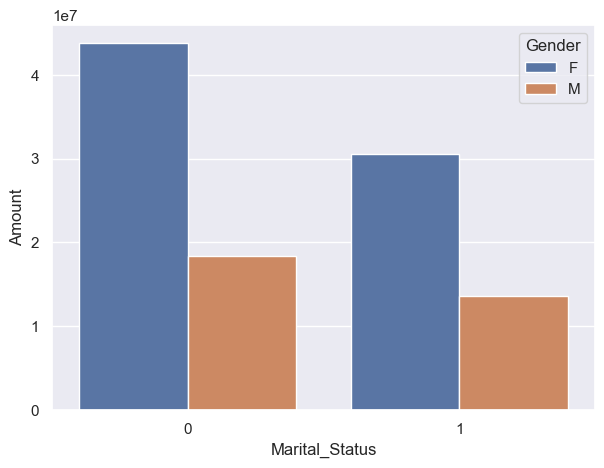

In [145]:
sns.barplot(data=sales_Mariatal_status,x='Marital_Status',y= 'Amount',hue='Gender')

## Short summary & analysis

- Gender
    - Females: ₹74.34M (≈70% of revenue). Males: ₹31.91M (≈30%).
    - Interpretation: revenue is heavily female-driven — prioritize female-focused promotions and product mixes.

- Marital status
    - Total revenue by marital status: Single — ₹62,125,384 (≈58.5%); Married — ₹44,123,745 (≈41.5%).
    - Gender split within statuses:
        - Single: Females ₹43,786,646 (≈70.5%), Males ₹18,338,738 (≈29.5%).
        - Married: Females ₹30,549,207 (≈69.2%), Males ₹13,574,538 (≈30.8%).
    - Interpretation: Females dominate revenue (~70%) across both marital-status groups; Single customers drive more total revenue than Married customers.
    

## 4- Occupation


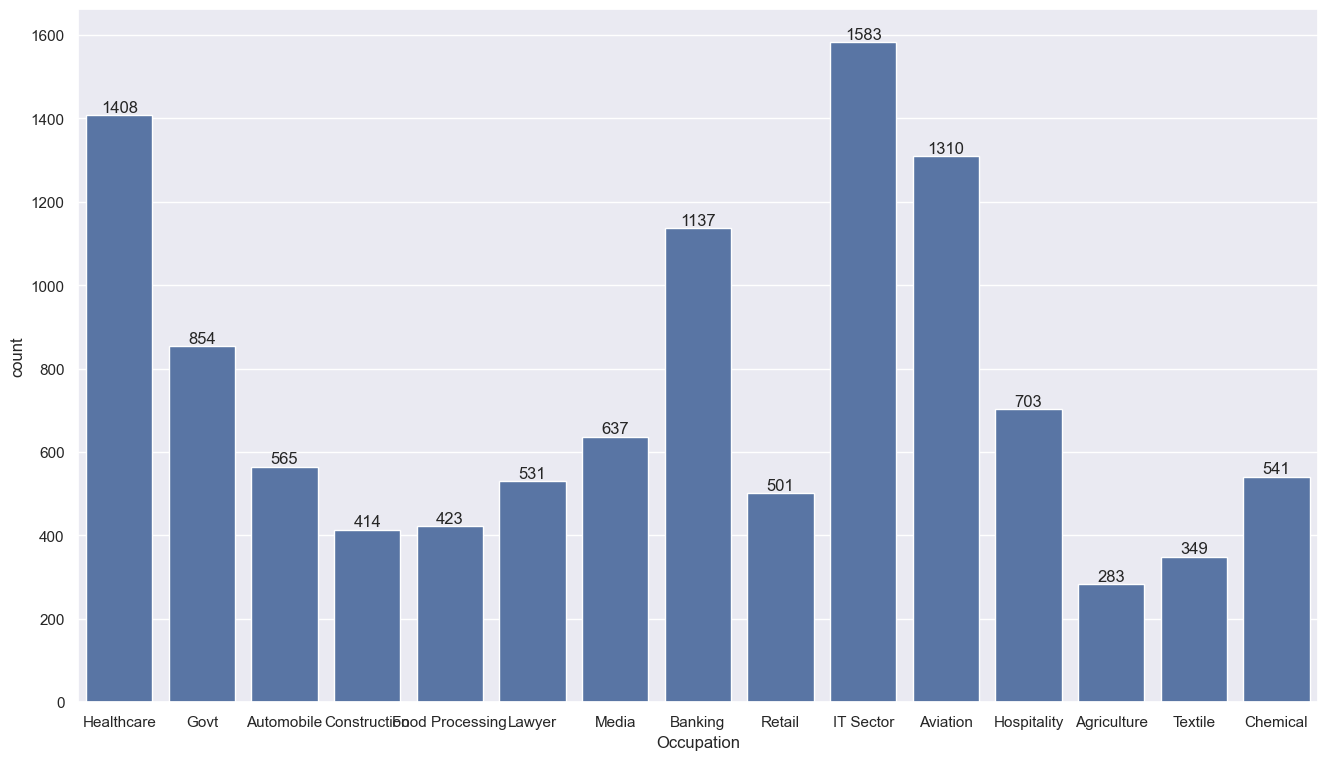

In [159]:
sns.set(rc={'figure.figsize':(16,9)})
ax = sns.countplot(data=df,x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

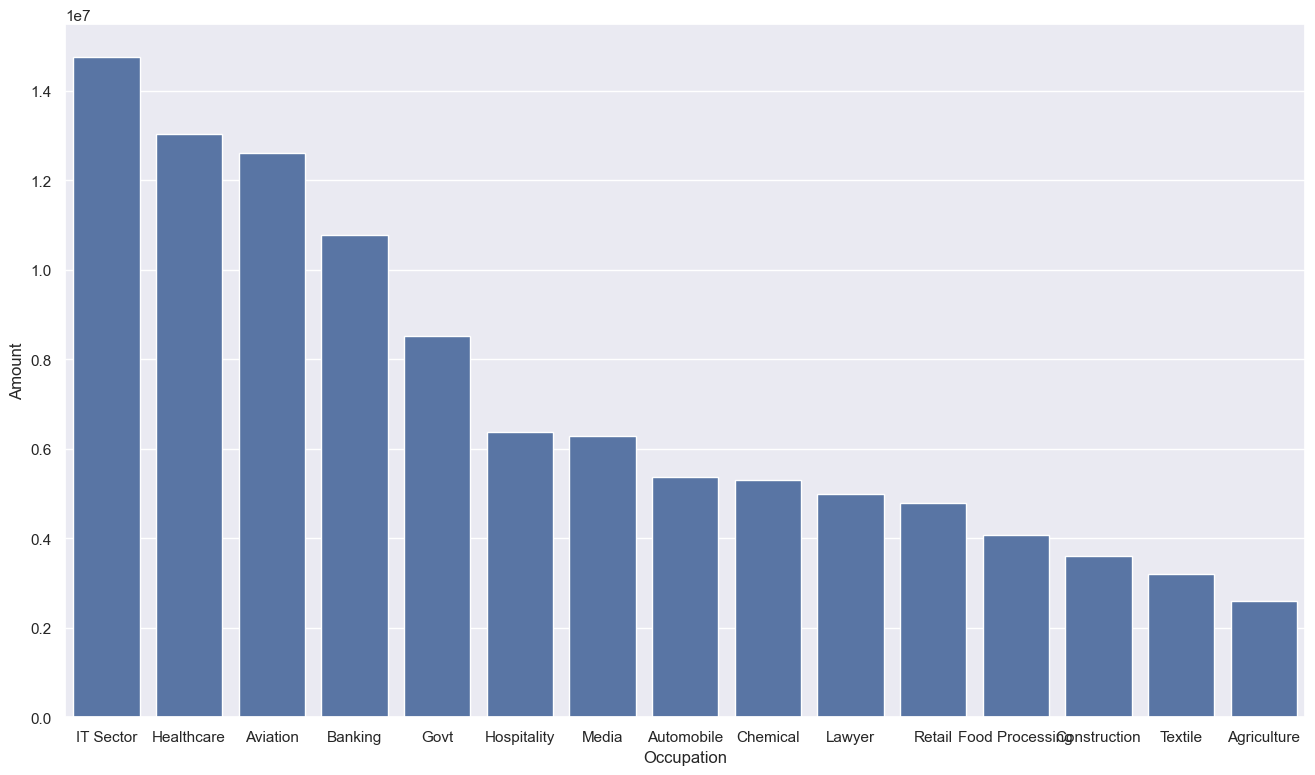

In [151]:
sales_by_occupation = df.groupby('Occupation',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(data=sales_by_occupation,x='Occupation',y='Amount')

## Statistical summary By Occupation
- Occupation (top contributors)
    - IT Sector: ₹14,755,079 (≈13.9%)
    - Healthcare: ₹13,034,586 (≈12.3%)
    - Aviation: ₹12,602,298 (≈11.9%)
    - Top 3 occupations combined: ₹40,391,963 (≈38.0% of revenue)


## 5- Product Category

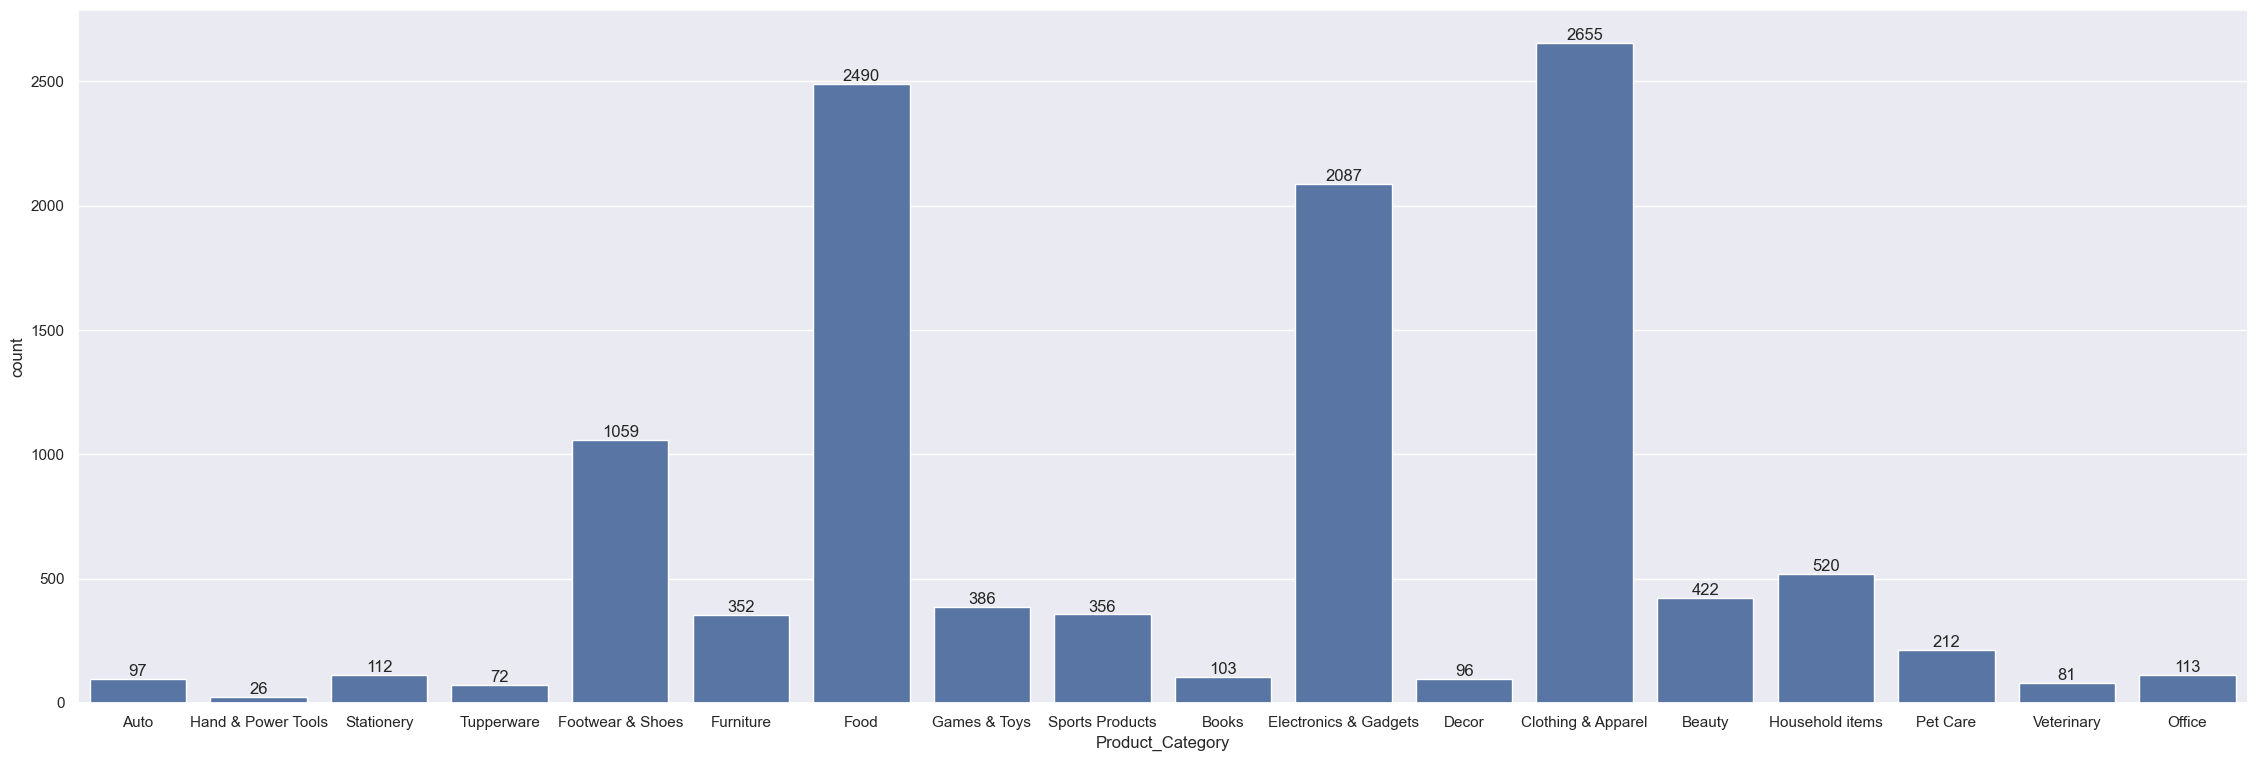

In [169]:
ax = sns.countplot(data = df, x='Product_Category')
sns.set(rc={'figure.figsize':(28,18)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

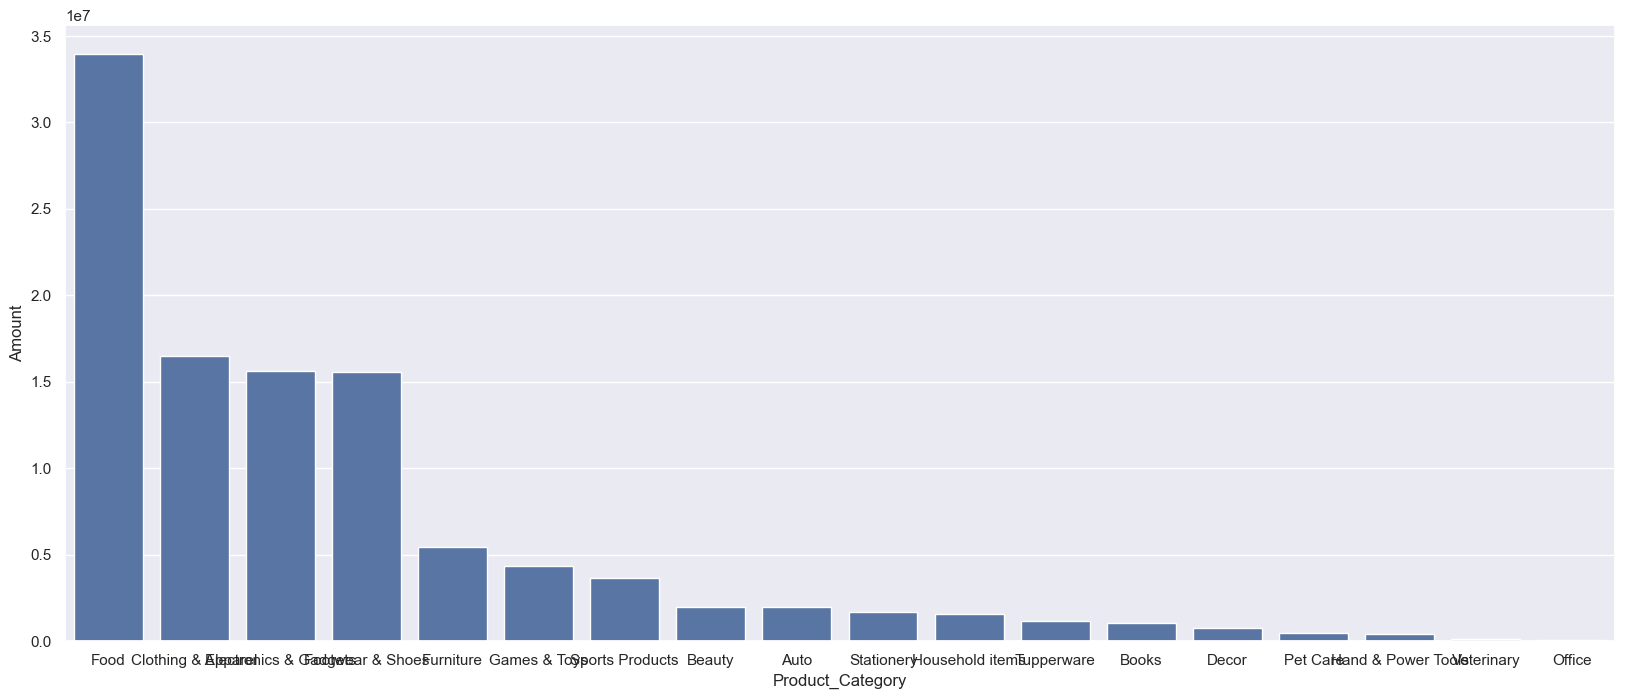

In [157]:
sales_by_product_category = df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data=sales_by_product_category,x='Product_Category',y='Amount')

## Product Category — Analysis

### Key findings
- Total revenue across categories: ₹106,249,129.  
- Top categories by revenue:
    - Food: ₹33,933,883 (~31.9% of total)  
    - Clothing & Apparel: ₹16,495,019 (~15.5%)  
    - Electronics & Gadgets: ₹15,643,846 (~14.7%)  
    - Footwear & Shoes: ₹15,575,209 (~14.7%)  
- Top 4 categories account for ~76.8% of total revenue — strong concentration in a few categories.  
- Remaining 14 categories form a long tail (many contribute <5% each).


<Axes: xlabel='Product_ID'>

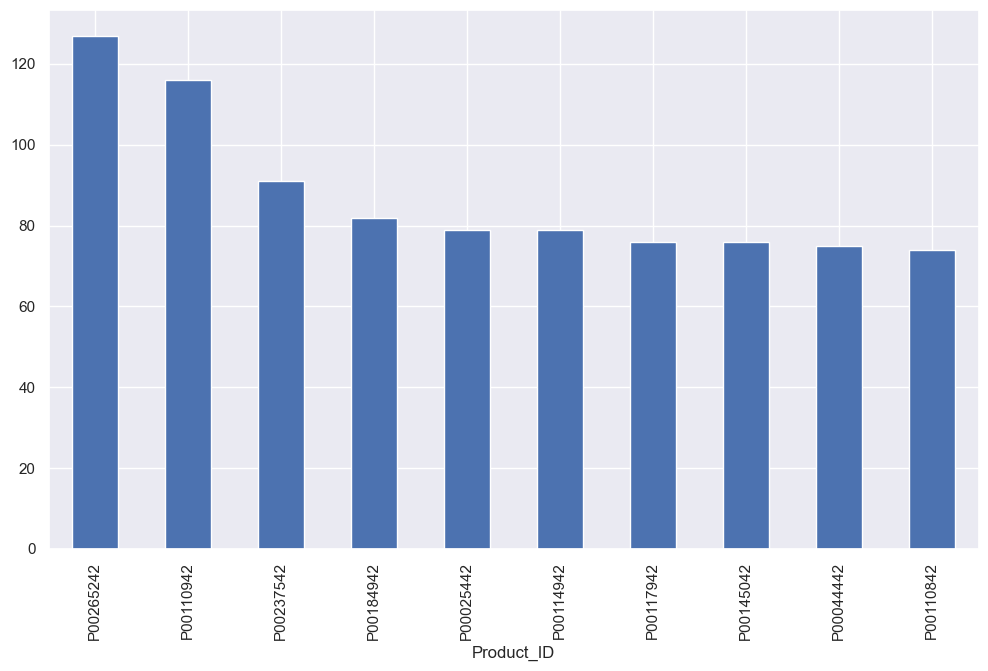

In [174]:
## Top 10 most sold products

fig1,ax1= plt.subplots(figsize=(12,7))

df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Analysis — data-driven observations

- Overall scale: total revenue ≈ ₹106.25M (Amount summed across dataset).ue ≈ ₹106.25M (Amount summed across dataset).
- Gender: revenue is heavily female-skewed — Females ≈ ₹74.34M (≈70%), Males ≈ ₹31.91M (≈30%).y female-skewed — Females ≈ ₹74.34M (≈70%), Males ≈ ₹31.91M (≈30%).
- Age: 26–35 is the dominant revenue cohort (₹42.61M), followed by 36–45 (₹22.14M) and 18–25 (₹17.24M). Demand concentrates in prime working-age groups.emand concentrates in prime working-age groups.
- Marital status: Single customers account for more revenue (~₹62.13M) than Married (~₹44.12M); female dominance persists within both groups.rsists within both groups.
- Geography: revenue concentrated in a few states — Uttar Pradesh is top (~₹19.37M). Top 3 states (UP, Maharashtra, Karnataka) contribute ~44–45% of revenue; tail states contribute a small share.tates (UP, Maharashtra, Karnataka) contribute ~44–45% of revenue; tail states contribute a small share.
- Product mix: strong concentration in a few categories — Food (~₹33.93M) is largest; top 4 categories (Food, Clothing, Electronics, Footwear) account for ~76.8% of revenue. Long tail of low-volume categories remains.Long tail of low-volume categories remains.
- Occupation: top contributors are IT (~₹14.76M), Healthcare (~₹13.03M) and Aviation (~₹12.60M) — occupation segments show meaningful revenue differences.
- Orders vs amount: order-count and revenue align for top geographies and categories but should be checked for high-value low-frequency SKUs. SKUs.
- Distributional note: revenue and orders are right-skewed — a small set of states/categories/segments drive most value.- Distributional note: revenue and orders are right-skewed — a small set of states/categories/segments drive most value.

